In [18]:
TRAIN_PATH= "./Data/train"
TEST_PATH= "./Data/test"

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.models import Sequential

In [20]:
#CNN Based Model in Keras 
model =Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3))) #this a standard size for kernal size

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

#comment for 2,3 layers
#model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(.25))

#comment for 2 layers
#model.add(Conv2D(128,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Flatten())

model.add(Dense(64,activation= 'relu'))
model.add(Dropout(0.5))

#model.add(Dense(1,activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)       

In [22]:
#Train from scratch #image pre prossessing
train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [23]:
#BatchNormalizatoin Train Data
train_generator= train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224), #Standard size, not too small, not too big 
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    subset="training",
    
)

Found 4116 images belonging to 3 classes.


In [24]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [25]:
#BatchNormalizatoin Validation Data
val_generator= train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224), 
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    subset="validation",
    
)

Found 1028 images belonging to 3 classes.


In [26]:
hist= model.fit(
    train_generator,
    steps_per_epoch=9,
    epochs=10,
    validation_data=val_generator,
    validation_steps=1
)

Epoch 1/10
9/9 [==============================] - 9s 544ms/step - loss: 3.1001 - accuracy: 0.4931 - val_loss: 1.1019 - val_accuracy: 0.0625
Epoch 2/10
9/9 [==============================] - 4s 461ms/step - loss: 0.9032 - accuracy: 0.6701 - val_loss: 0.9622 - val_accuracy: 0.6250
Epoch 3/10
9/9 [==============================] - 4s 493ms/step - loss: 0.7573 - accuracy: 0.7049 - val_loss: 1.0059 - val_accuracy: 0.5625
Epoch 4/10
9/9 [==============================] - 4s 468ms/step - loss: 0.7097 - accuracy: 0.7153 - val_loss: 0.9378 - val_accuracy: 0.7188
Epoch 5/10
9/9 [==============================] - 4s 492ms/step - loss: 0.6860 - accuracy: 0.7188 - val_loss: 0.6670 - val_accuracy: 0.8750
Epoch 6/10
9/9 [==============================] - 5s 522ms/step - loss: 0.6424 - accuracy: 0.6944 - val_loss: 0.6222 - val_accuracy: 0.8125
Epoch 7/10
9/9 [==============================] - 4s 476ms/step - loss: 0.5188 - accuracy: 0.7639 - val_loss: 0.5403 - val_accuracy: 0.8125
Epoch 8/10
9/9 [====

In [27]:
#model.save('my_model.h5')

In [28]:
test_dataset= image.ImageDataGenerator(rescale=1./255)

test_generator= train_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(224,224), 
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb"
)

Found 1288 images belonging to 3 classes.


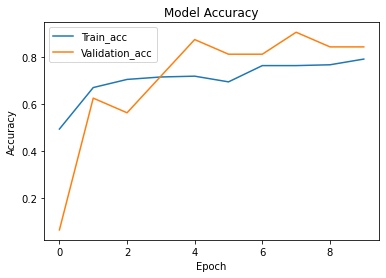

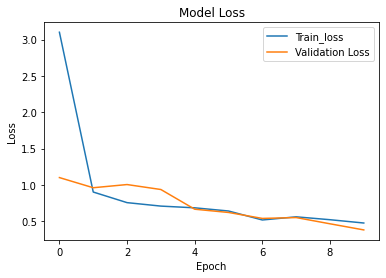

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

In [30]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

Evaluate on test data
41/41 [==============================] - 15s 377ms/step - loss: 0.3442 - accuracy: 0.8828
test loss, test acc: [0.3441961109638214, 0.8827639818191528]
